???
=============

Set-Up
----
First, import the necessary modules.

In [1]:
%matplotlib inline

from iexfinance.stocks import Stock
from iexfinance.stocks import get_historical_data
from iexfinance.stocks import get_historical_intraday
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib import style
import numpy as np
import pandas as pd
from pandas.plotting import register_matplotlib_converters
from pylab import *
import time
from datetime import datetime

Load the API keys.

In [2]:
API_PUBLIC_KEY = 'pk_65b52176e67f4e8d86a61b3273d98107'
API_SECRET_KEY = 'sk_0df76468e959446e88abe99920684244'

Init the STONKS.

In [3]:
aapl = Stock('AAPL', token = API_SECRET_KEY)
bynd = Stock('BYND', token = API_SECRET_KEY)
goog = Stock('GOOG', token = API_SECRET_KEY)
tsla = Stock('TSLA', token = API_SECRET_KEY)

Some more for fun ;)

In [4]:
ncr = Stock('NCR', token = API_SECRET_KEY)
blk = Stock('BLK', token = API_SECRET_KEY)
efx = Stock('EFX', token = API_SECRET_KEY)
cof = Stock('COF', token = API_SECRET_KEY)
acn = Stock('ACN', token = API_SECRET_KEY)

Let's look at some historical data. Real-time data is supported but unideal for the purposes of this demonstration as the market doesn't operate on weekends.

In [5]:
df_appl = aapl.get_historical_prices()
df_bynd = bynd.get_historical_prices()
df_goog = goog.get_historical_prices()
df_tsla = tsla.get_historical_prices()
df_ncr = ncr.get_historical_prices()
df_efx = efx.get_historical_prices()
df_cof = cof.get_historical_prices()
df_acn = acn.get_historical_prices()

In [6]:
df_bynd

[{'date': '2019-09-26',
  'open': 160.51,
  'close': 154.34,
  'high': 160.6,
  'low': 148.6,
  'volume': 8096727,
  'uOpen': 160.51,
  'uClose': 154.34,
  'uHigh': 160.6,
  'uLow': 148.6,
  'uVolume': 8096727,
  'change': 0,
  'changePercent': 0,
  'label': 'Sep 26',
  'changeOverTime': 0},
 {'date': '2019-09-27',
  'open': 151,
  'close': 151.66,
  'high': 153.81,
  'low': 148.9,
  'volume': 1994438,
  'uOpen': 151,
  'uClose': 151.66,
  'uHigh': 153.81,
  'uLow': 148.9,
  'uVolume': 1994438,
  'change': -2.68,
  'changePercent': -1.7364,
  'label': 'Sep 27',
  'changeOverTime': -0.017364},
 {'date': '2019-09-30',
  'open': 150.69,
  'close': 148.62,
  'high': 151,
  'low': 145.68,
  'volume': 1674602,
  'uOpen': 150.69,
  'uClose': 148.62,
  'uHigh': 151,
  'uLow': 145.68,
  'uVolume': 1674602,
  'change': -3.04,
  'changePercent': -2.0045,
  'label': 'Sep 30',
  'changeOverTime': -0.037061},
 {'date': '2019-10-01',
  'open': 148.65,
  'close': 146.42,
  'high': 149.4,
  'low': 143.

Check the type of the data so we can visualize the data.

In [7]:
type(df_bynd)

list

Alternatively: We want to simulate real-time visualizations by pretending that it's a weekday. Hence, it may not be useful to simply look at daily data for the past month. We want minutely-reported data.

In [8]:
datetime

datetime.datetime

In [9]:
date = datetime(2019, 10, 25)

data = get_historical_intraday('BYND', date, output_format='pandas', token = API_SECRET_KEY)

In [10]:
display(data)

,date,label,high,low,average,volume,notional,numberOfTrades,marketHigh,marketLow,marketAverage,marketVolume,marketNotional,marketNumberOfTrades,open,close,marketOpen,marketClose,changeOverTime,marketChangeOverTime
2019-10-25 09:30:00,2019-10-25,09:30 AM,101.735,101.000,101.581,500,50790.500,5,102.000,101.00,101.725,53666,5.459148e+06,87,101.735,101.000,101.77,101.000,0.000000,0.000000
2019-10-25 09:31:00,2019-10-25,09:31 AM,101.060,101.060,101.060,100,10106.000,1,101.270,100.11,100.919,15213,1.535283e+06,60,101.060,101.060,101.01,100.110,-0.005129,-0.007923
2019-10-25 09:32:00,2019-10-25,09:32 AM,100.365,100.100,100.233,200,20046.500,2,100.610,100.10,100.174,9613,9.629745e+05,23,100.100,100.365,100.25,100.250,-0.013270,-0.015247
2019-10-25 09:33:00,2019-10-25,09:33 AM,100.290,100.050,100.179,800,80143.000,8,100.415,100.00,100.176,12824,1.284658e+06,72,100.060,100.270,100.33,100.370,-0.013802,-0.015227
2019-10-25 09:34:00,2019-10-25,09:34 AM,100.275,99.905,100.271,102,10227.605,3,100.275,99.72,99.965,10692,1.068821e+06,60,100.275,99.905,100.27,99.939,-0.012896,-0.017302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-25 15:55:00,2019-10-25,3:55 PM,NaN,NaN,NaN,0,0.000,0,100.950,100.75,100.870,14433,1.455858e+06,95,NaN,NaN,100.90,100.750,NaN,-0.008405
2019-10-25 15:56:00,2019-10-25,3:56 PM,100.900,100.780,100.823,300,30247.000,3,100.950,100.68,100.798,19997,2.015666e+06,155,100.780,100.900,100.76,100.940,-0.007462,-0.009113
2019-10-25 15:57:00,2019-10-25,3:57 PM,101.030,101.000,101.015,600,60609.000,4,101.050,100.76,100.943,27706,2.796719e+06,165,101.000,101.030,100.80,100.900,-0.005572,-0.007687
2019-10-25 15:58:00,2019-10-25,3:58 PM,100.900,100.730,100.835,550,55459.500,6,100.940,100.73,100.817,24875,2.507836e+06,154,100.870,100.730,100.94,100.730,-0.007344,-0.008926


We can also get the closing price and volume for any stock on any market-open date.

In [11]:
get_historical_data('BYND', '20191025', close_only=True, token = API_SECRET_KEY)

{'2019-10-25': {'close': 100.81, 'volume': 3312802}}

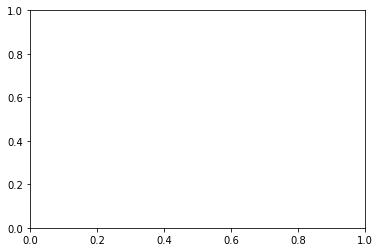

In [12]:
style.use('seaborn-bright')

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

Define a function that plots points minutely given a pandas dataframe.

In [13]:
def animate(i):
    xs = []
    ys = []
    for idx, row in data.iterrows():
        if not pd.isnull(row['average']):
            ys.append(row['average'])
            xs.append(idx)
        else:
            continue
    ax1.clear()
    ax1.plot(xs, ys)

WARNING! This visualization is sped up 60*.

In [14]:
register_matplotlib_converters()
ani = animation.FuncAnimation(fig, animate, interval=1000)
plt.show()

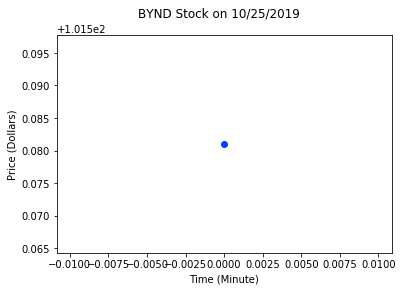

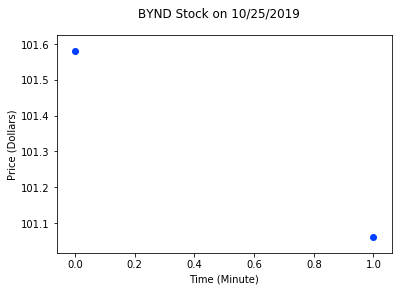

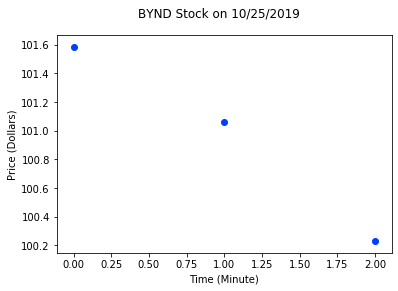

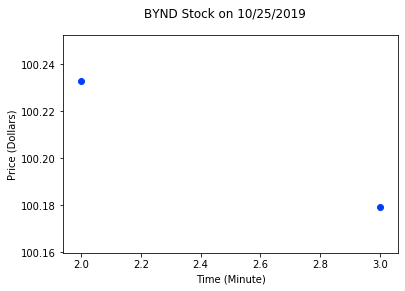

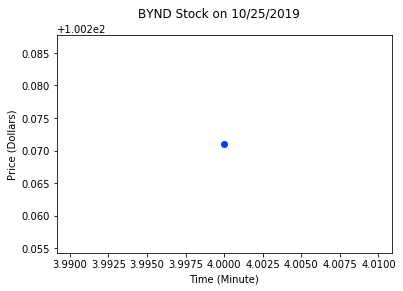

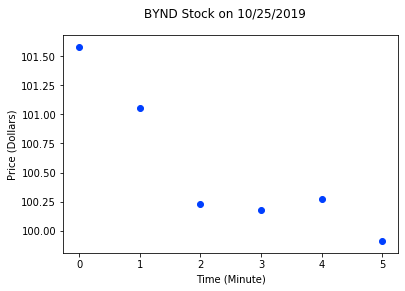

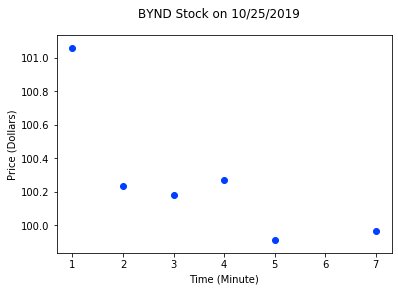

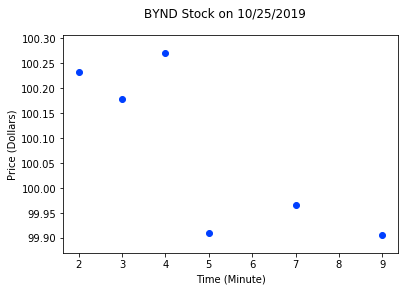

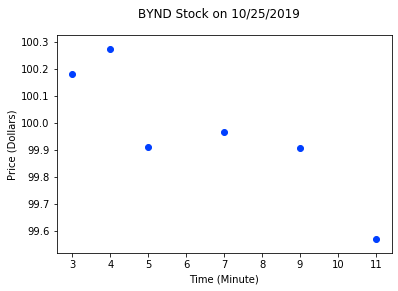

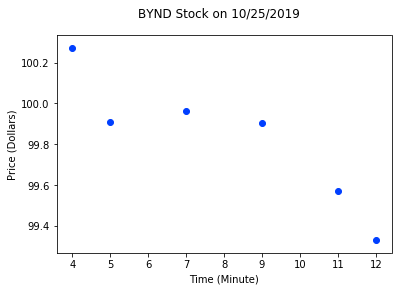

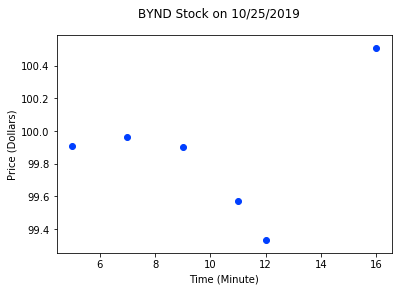

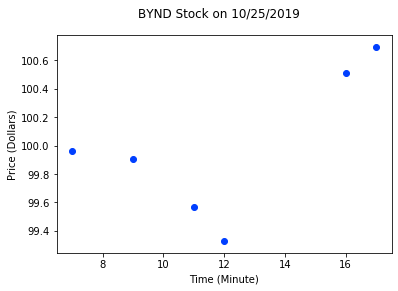

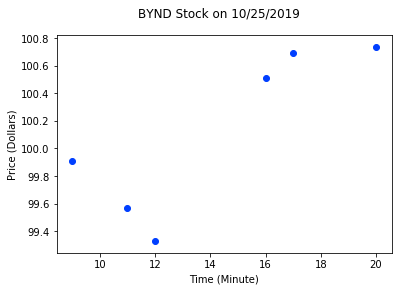

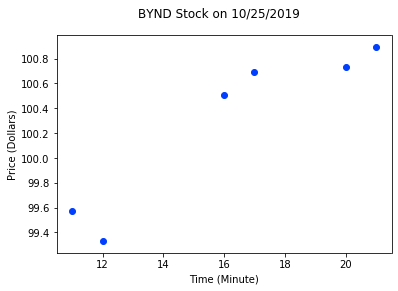

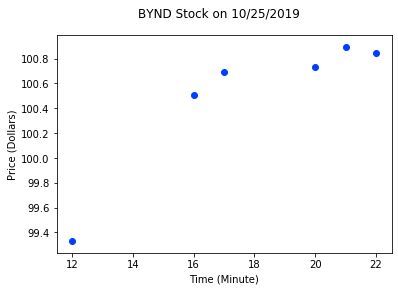

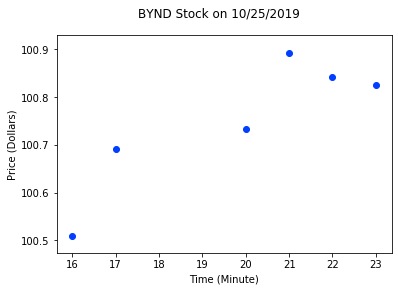

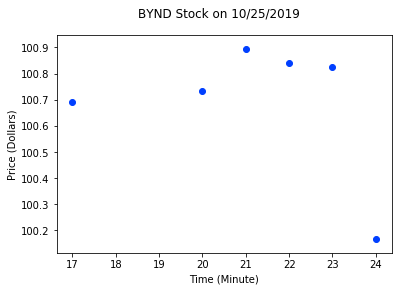

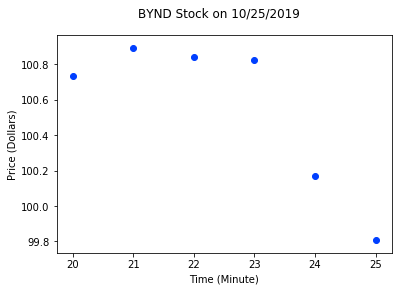

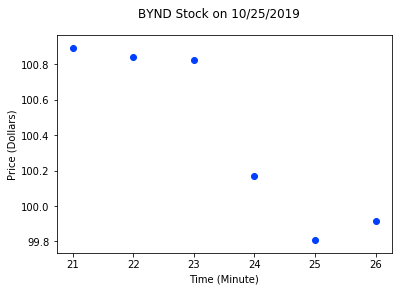

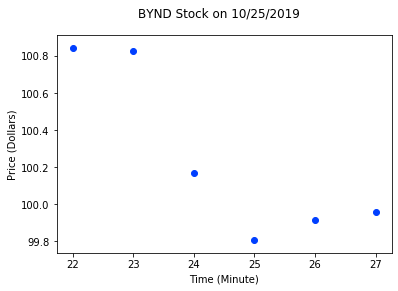

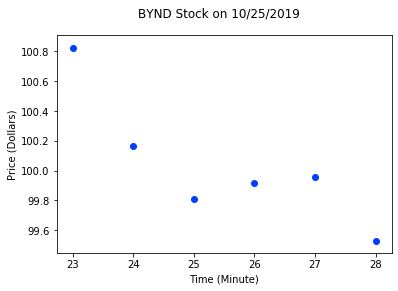

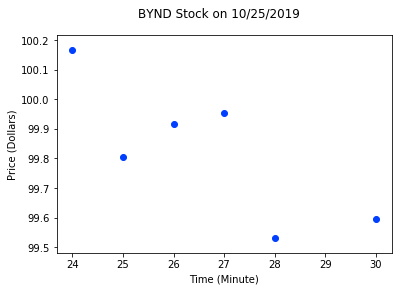

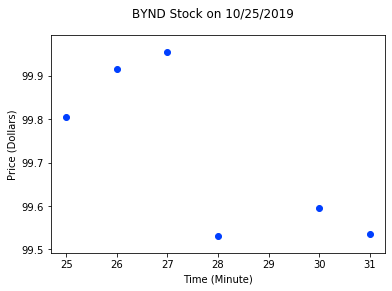

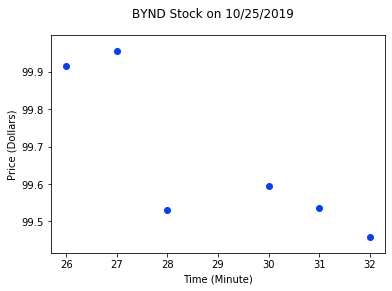

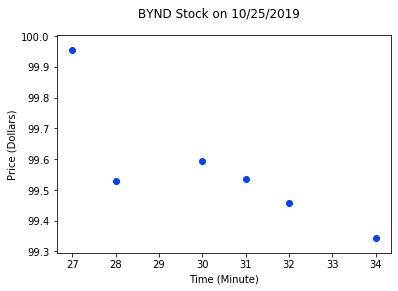

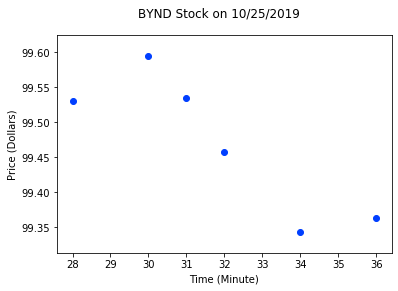

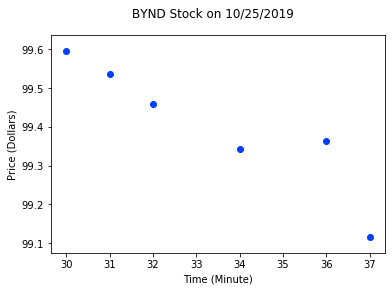

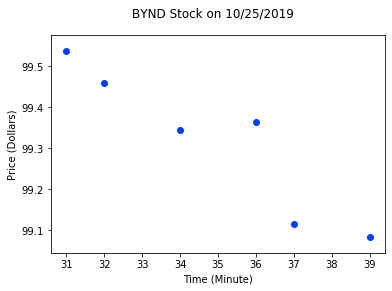

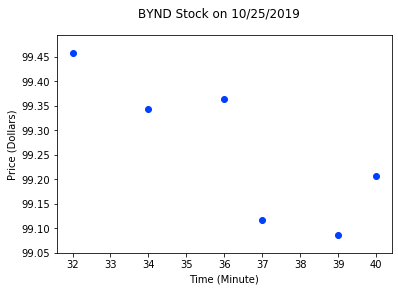

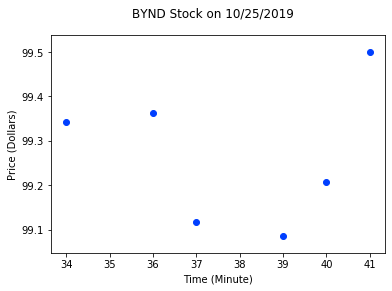

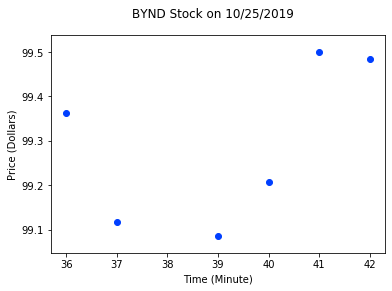

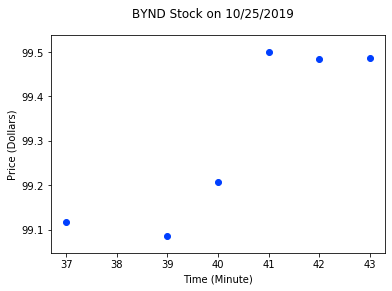

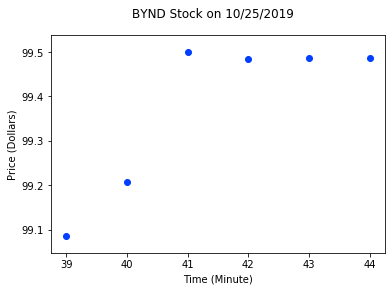

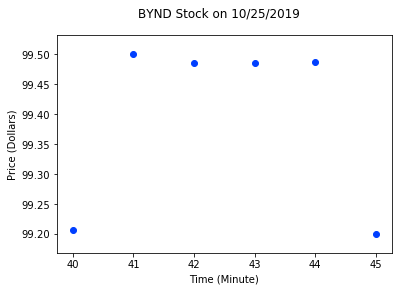

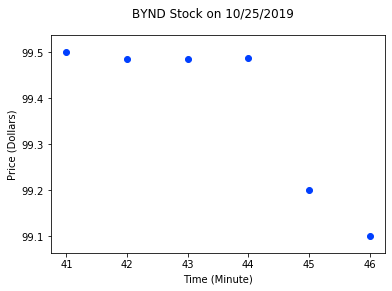

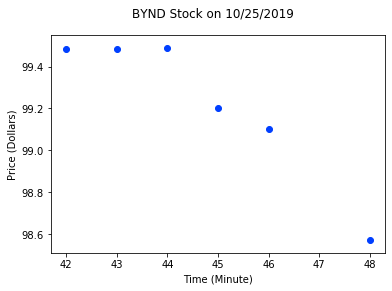

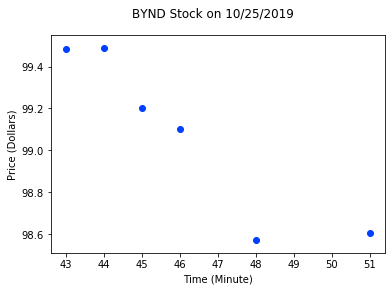

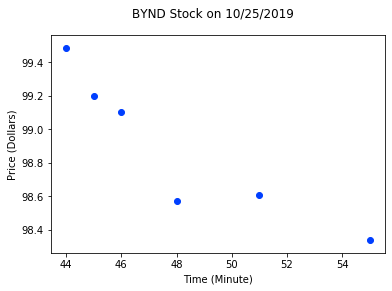

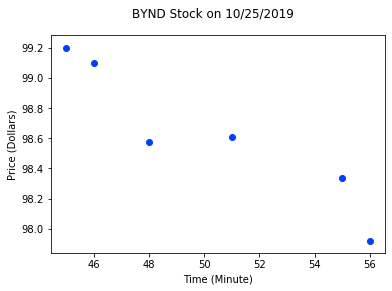

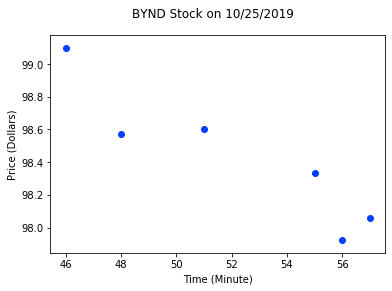

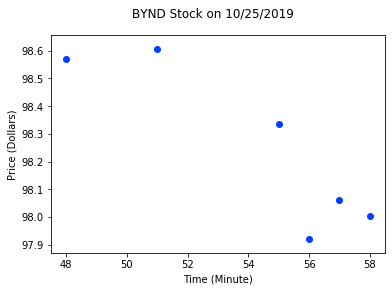

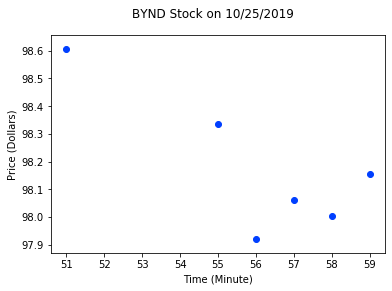

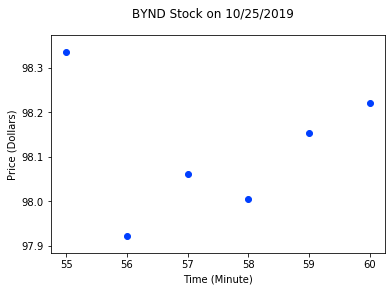

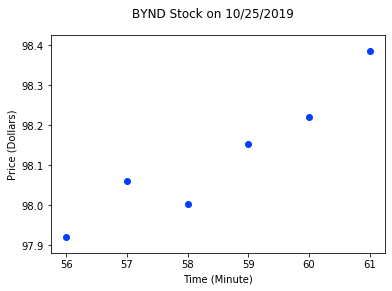

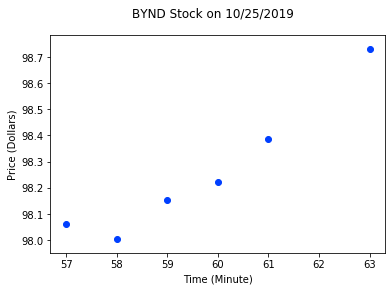

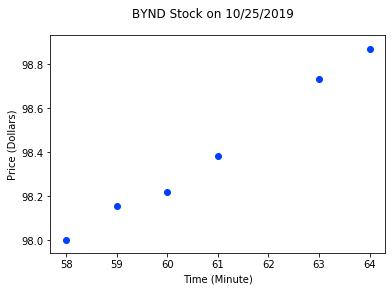

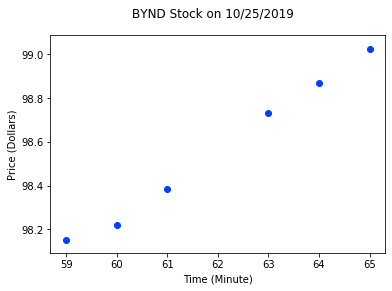

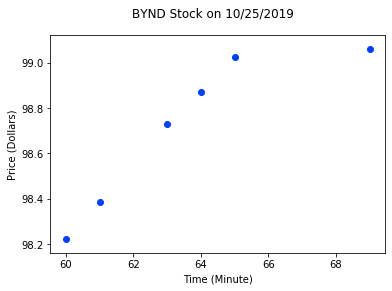

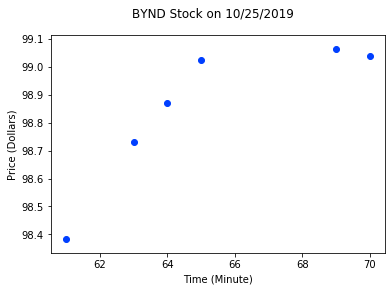

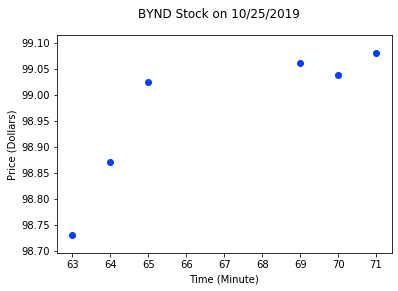

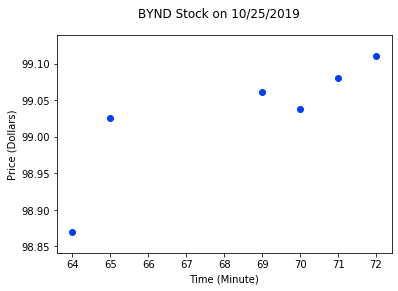

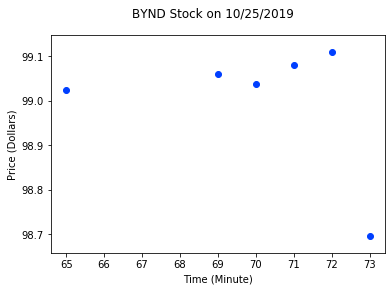

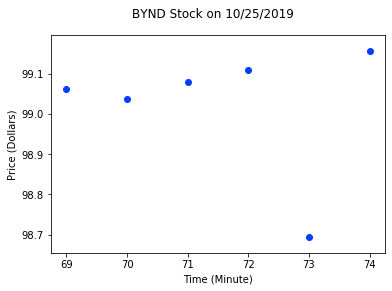

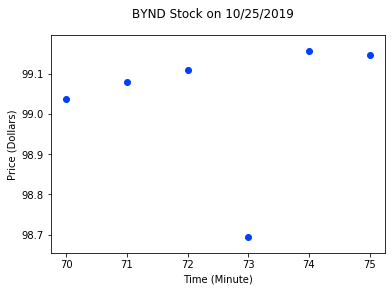

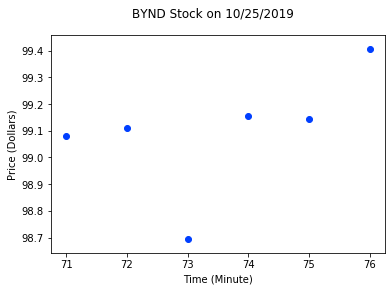

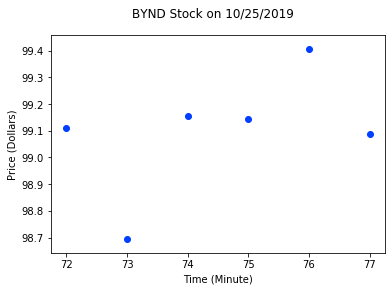

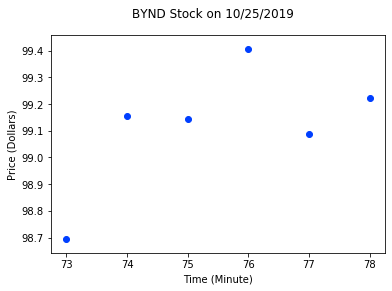

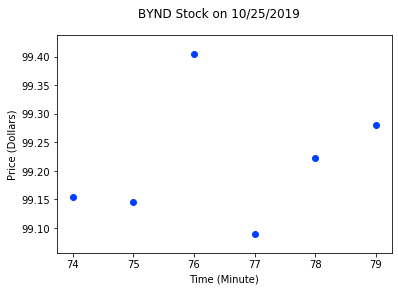

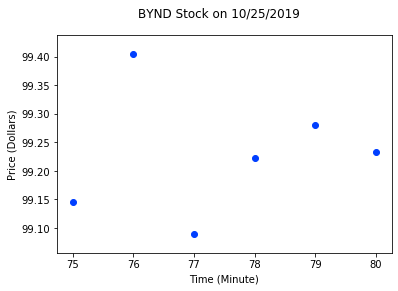

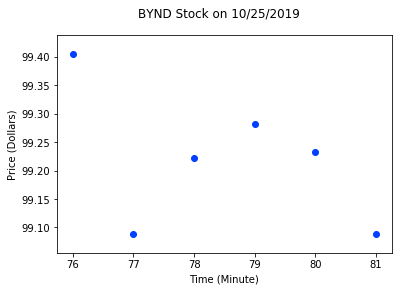

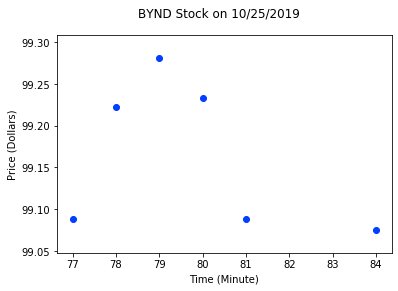

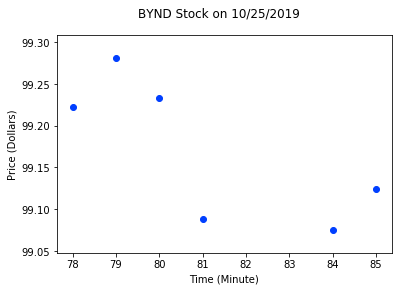

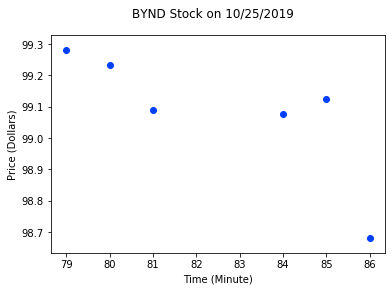

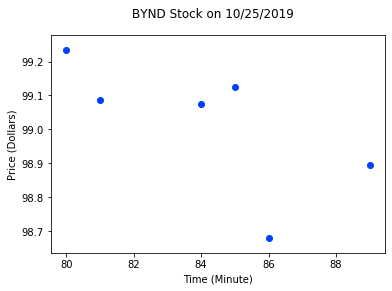

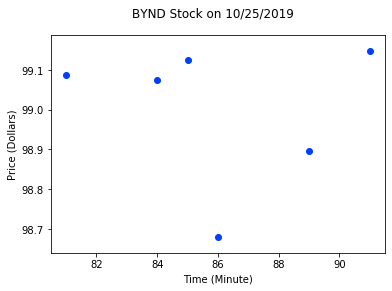

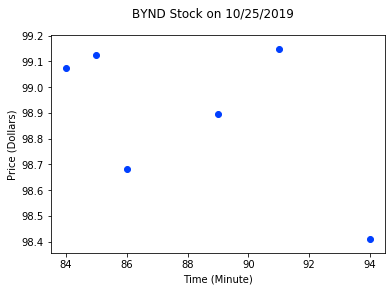

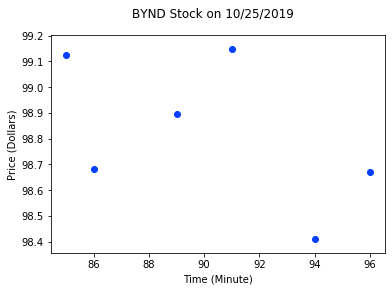

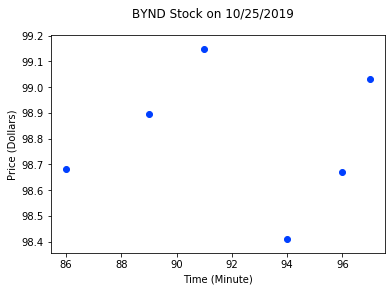

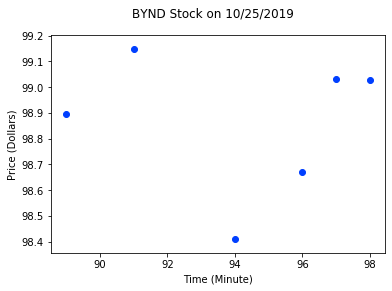

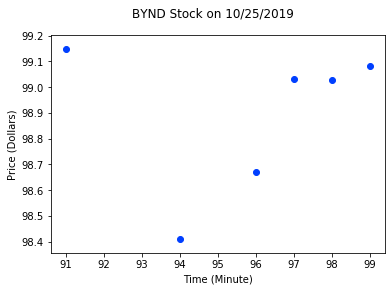

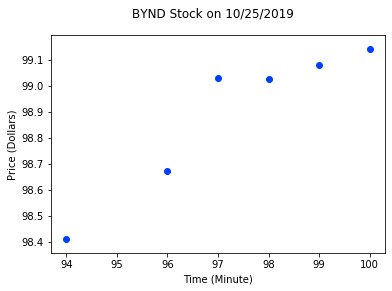

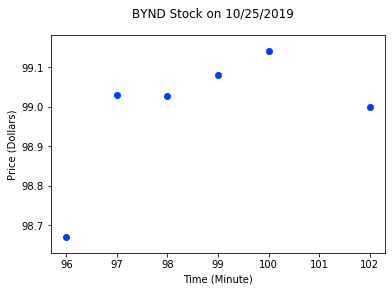

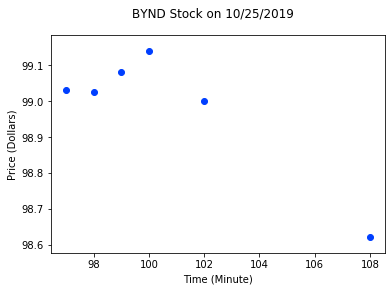

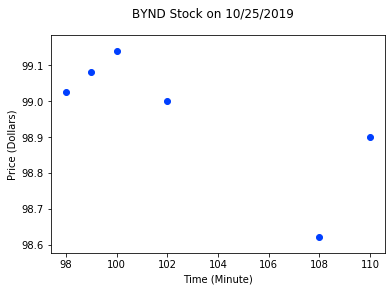

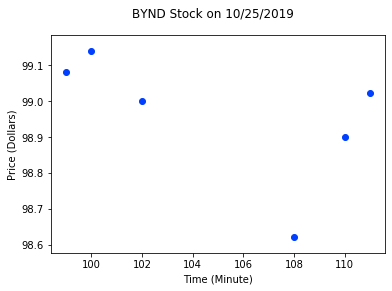

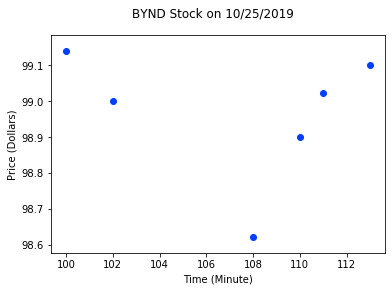

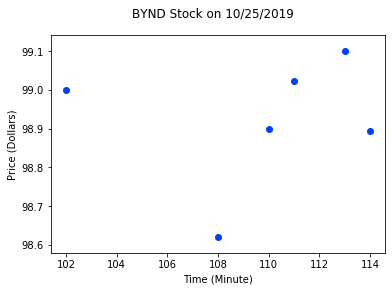

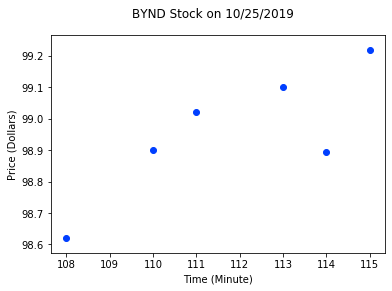

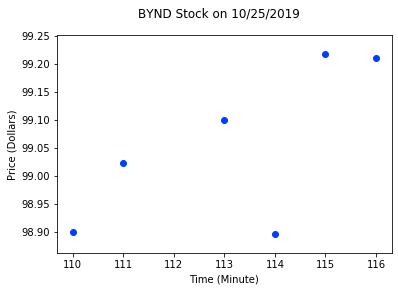

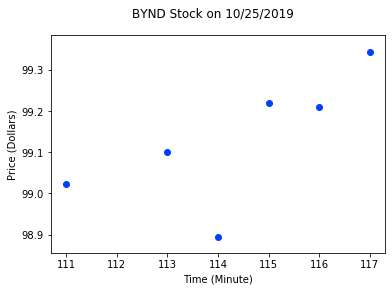

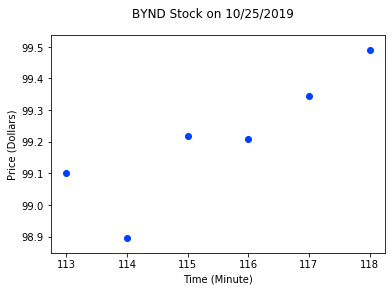

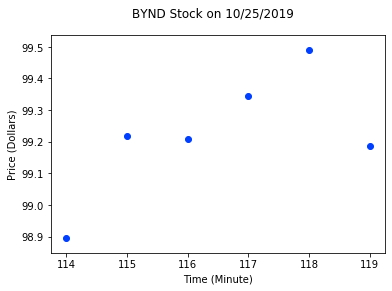

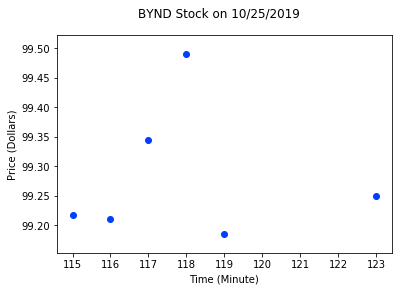

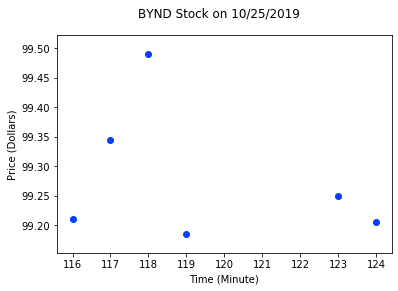

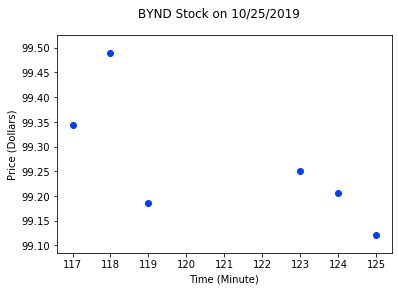

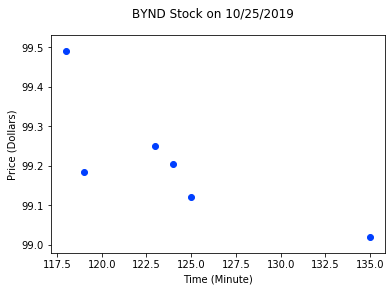

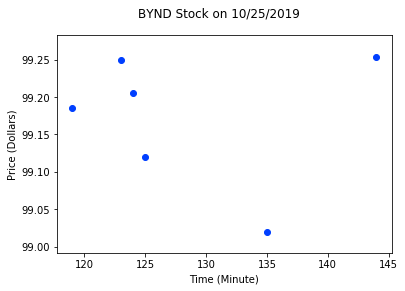

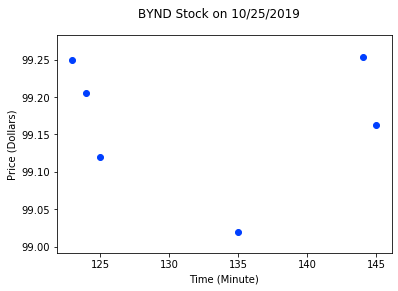

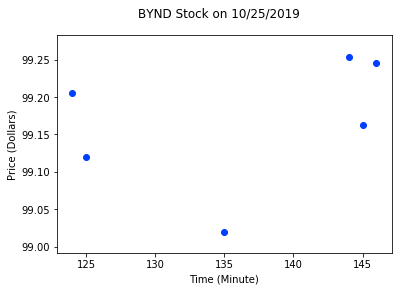

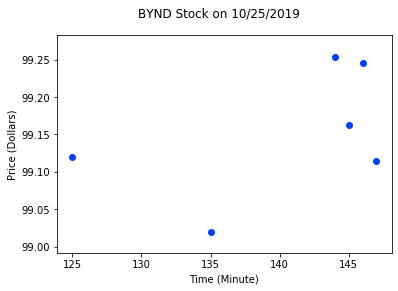

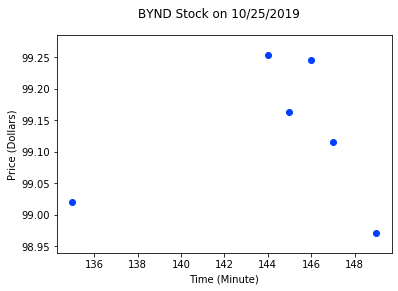

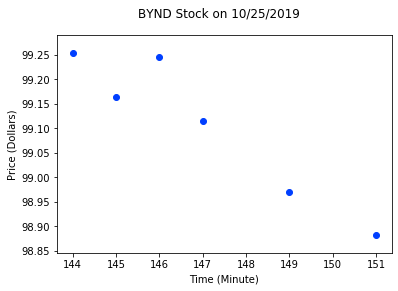

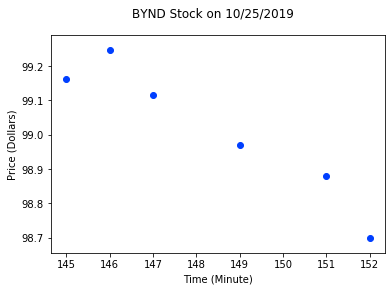

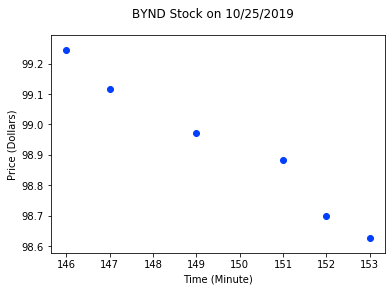

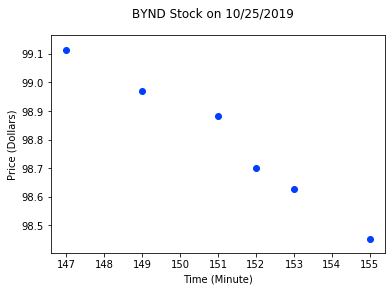

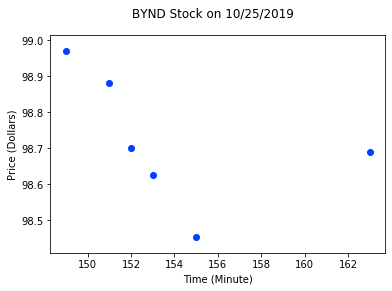

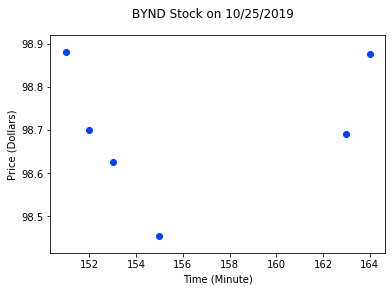

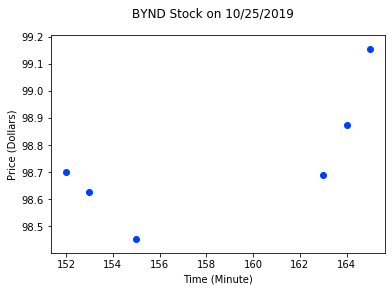

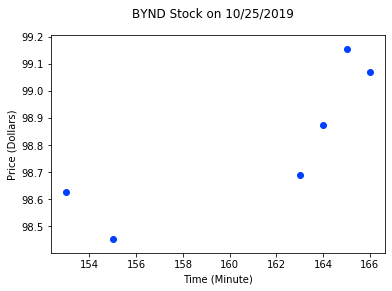

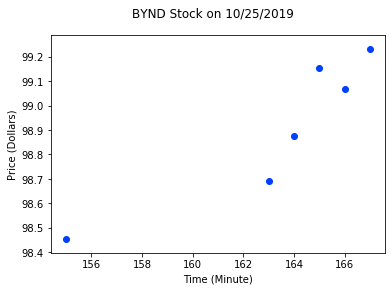

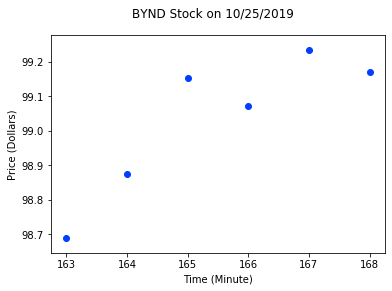

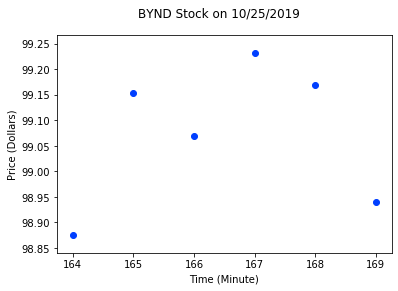

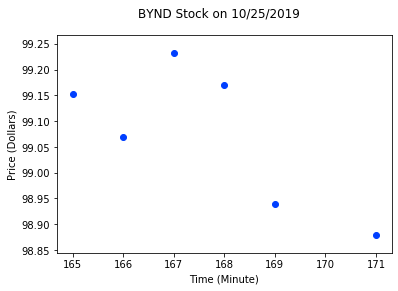

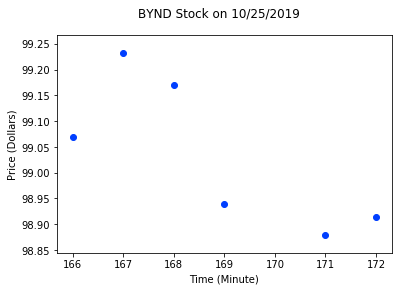

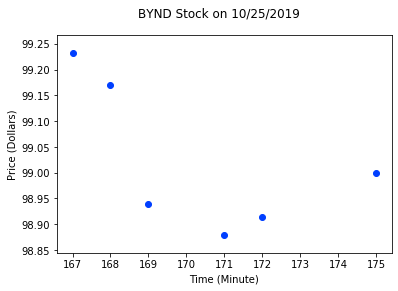

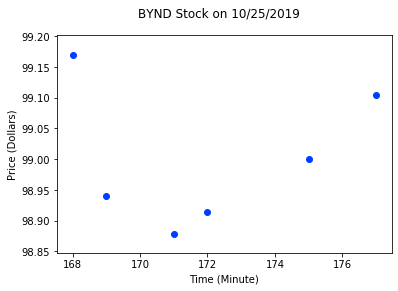

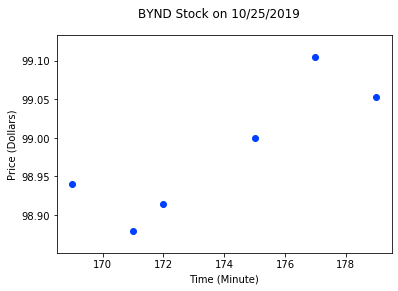

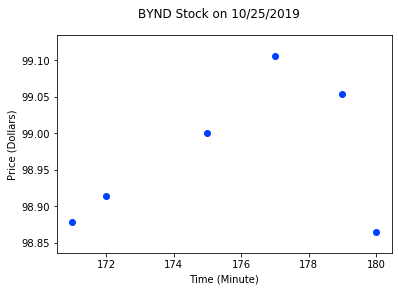

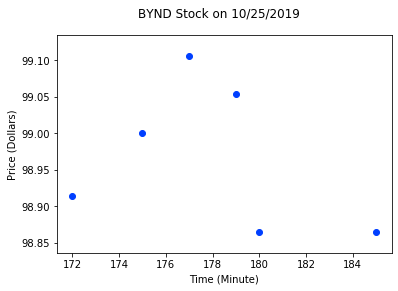

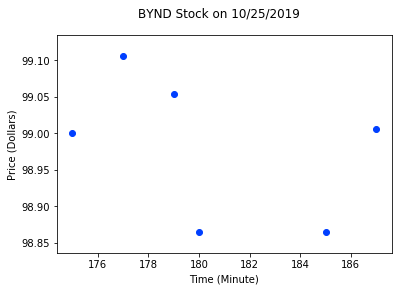

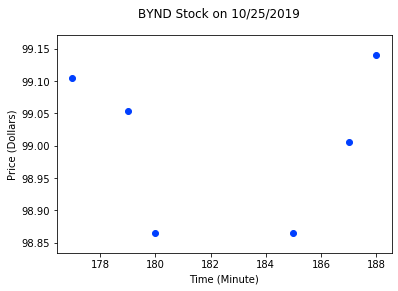

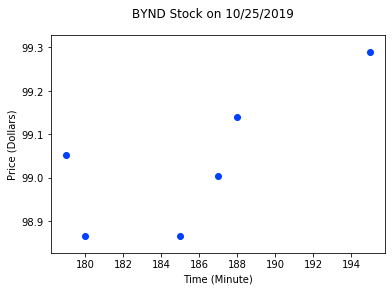

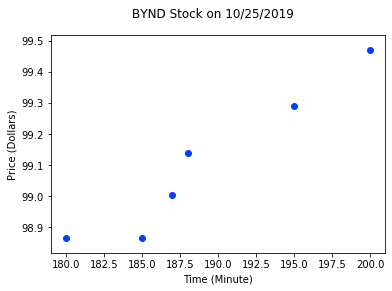

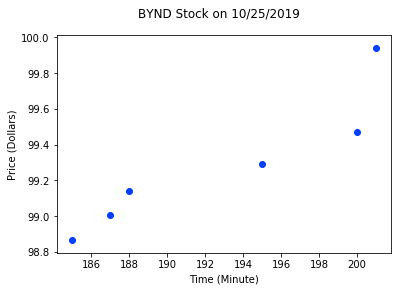

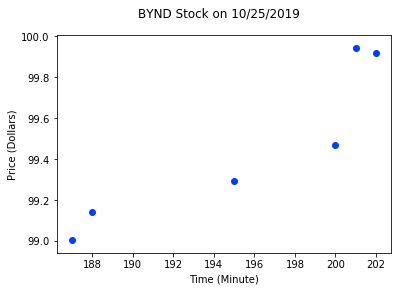

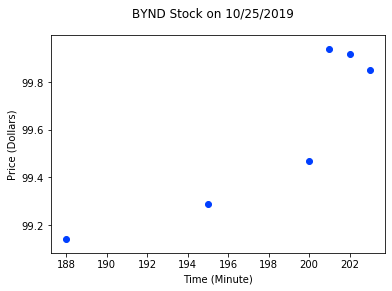

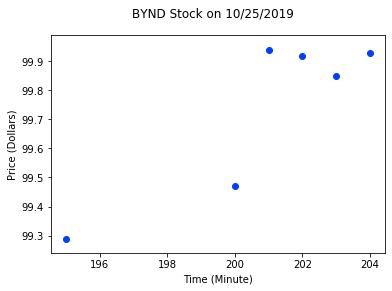

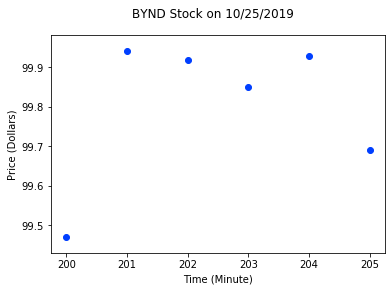

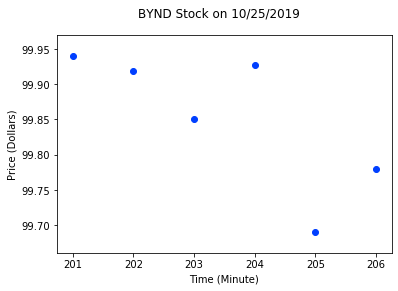

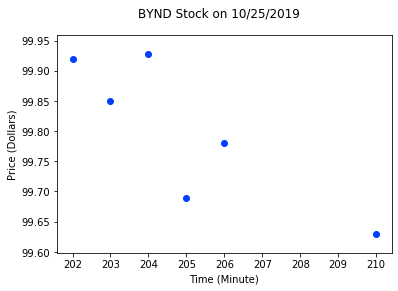

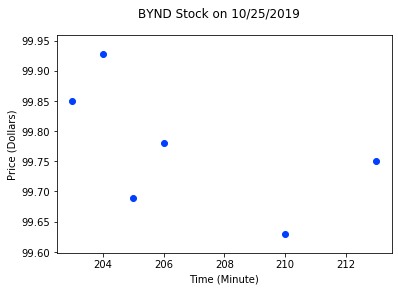

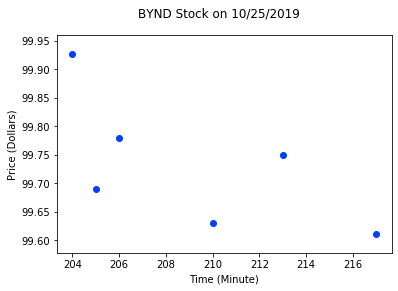

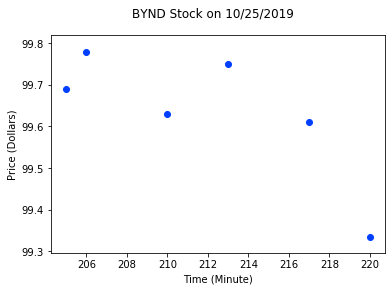

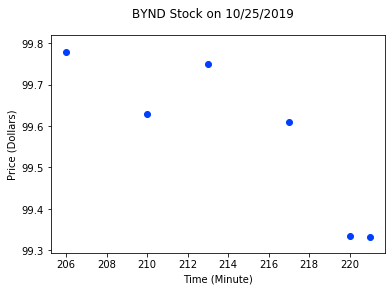

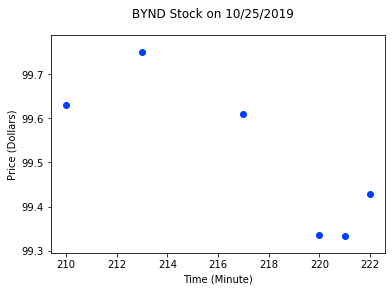

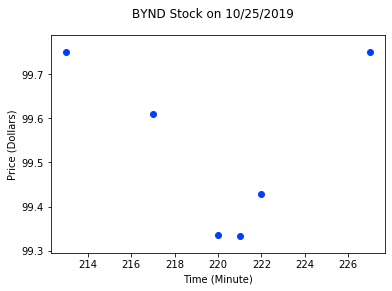

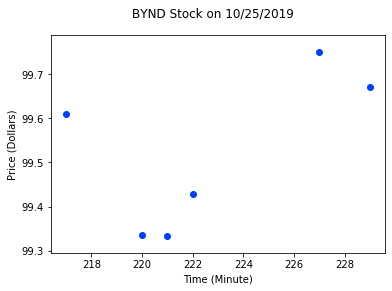

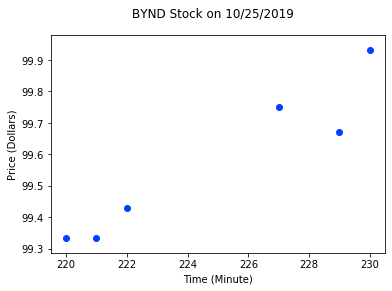

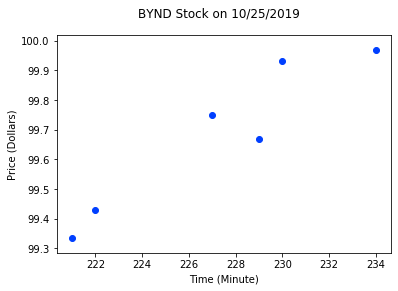

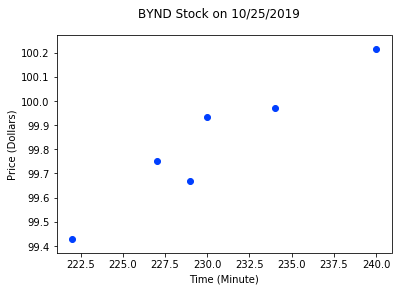

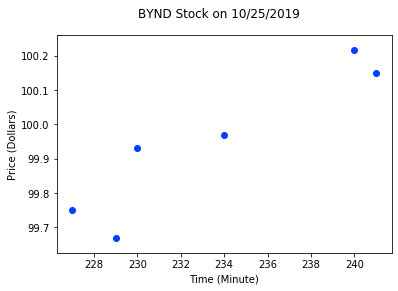

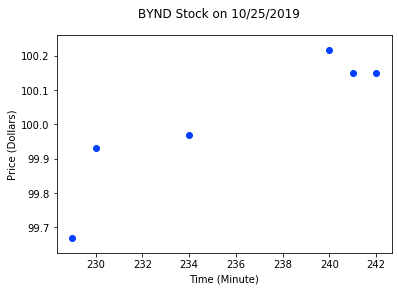

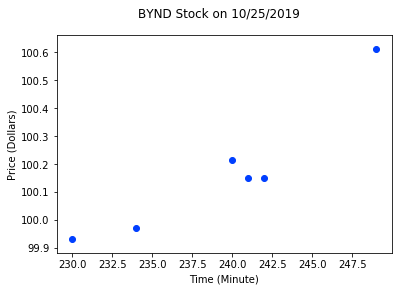

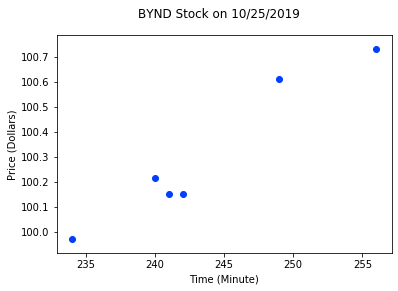

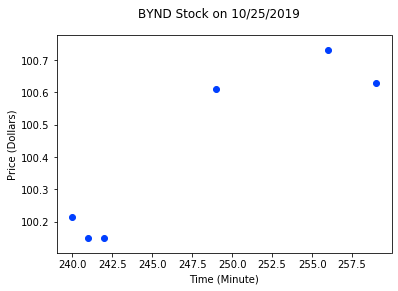

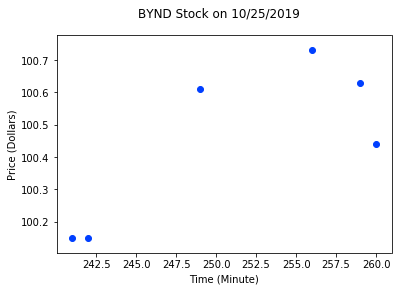

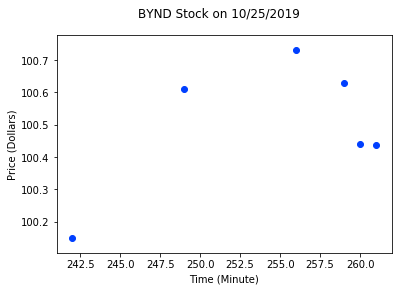

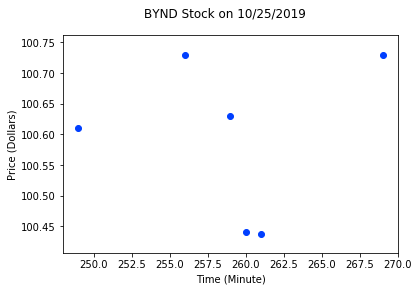

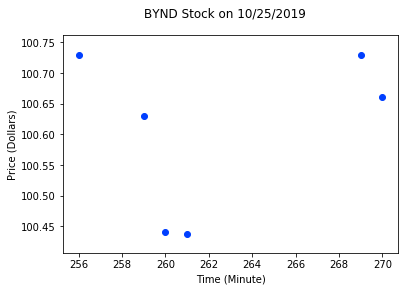

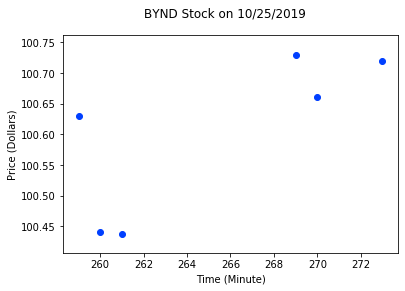

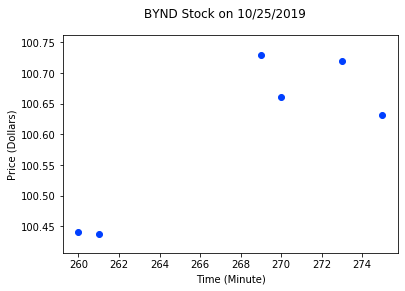

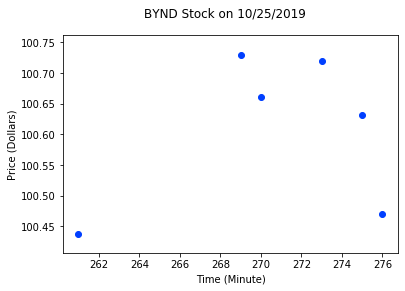

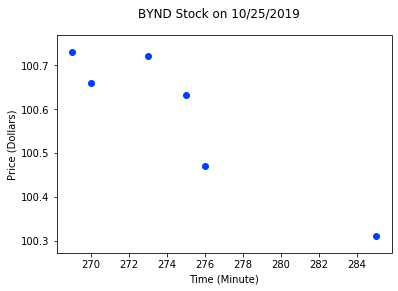

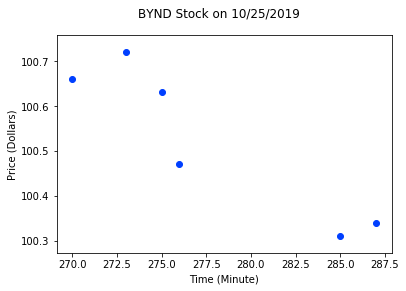

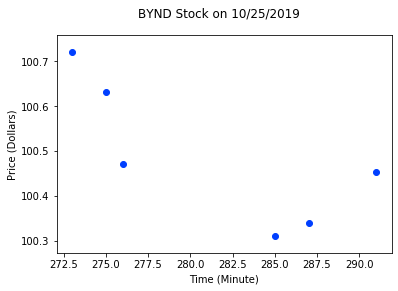

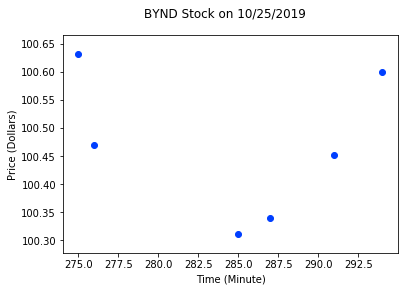

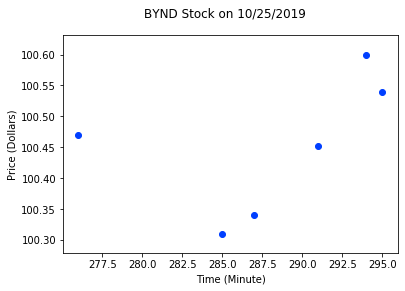

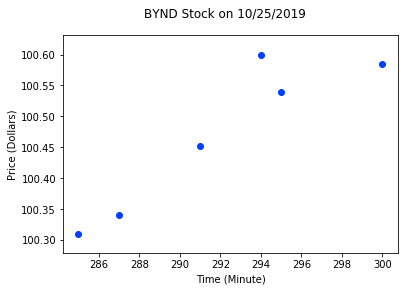

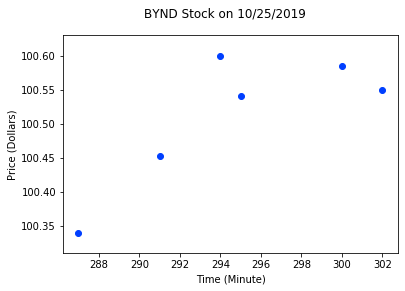

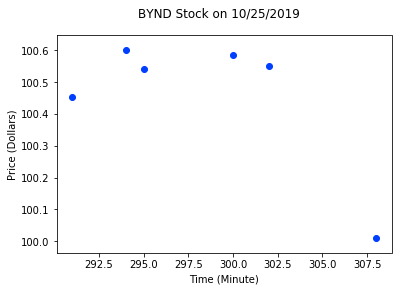

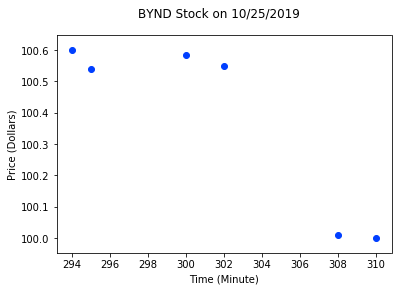

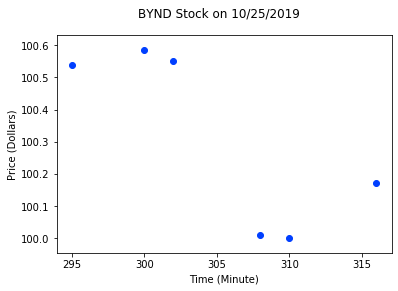

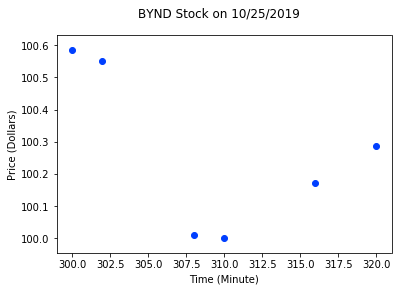

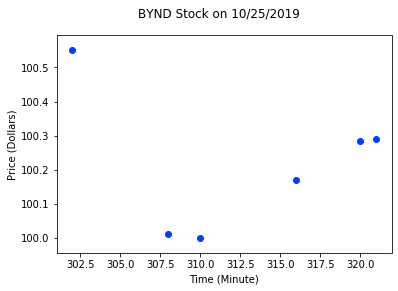

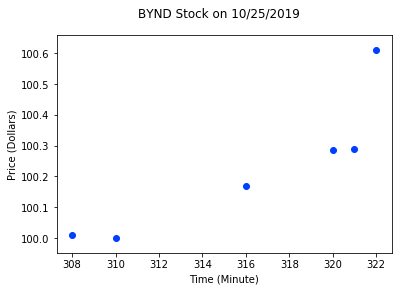

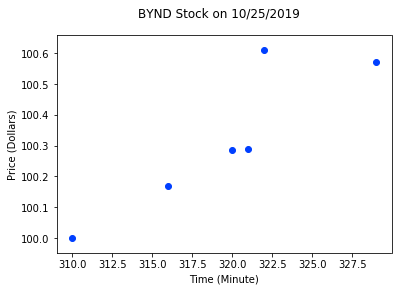

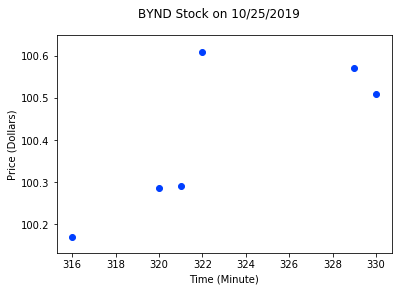

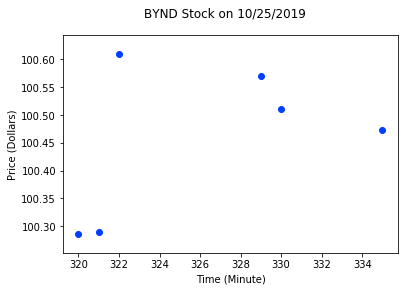

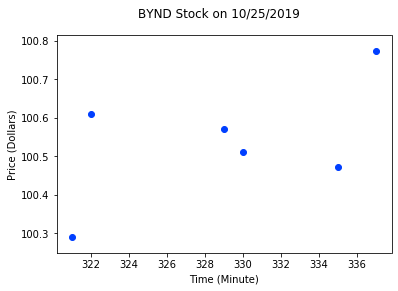

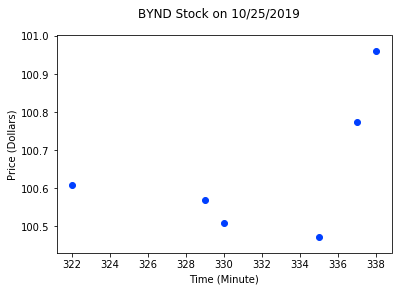

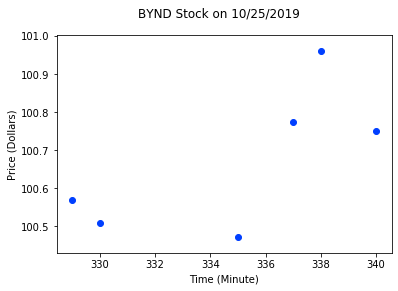

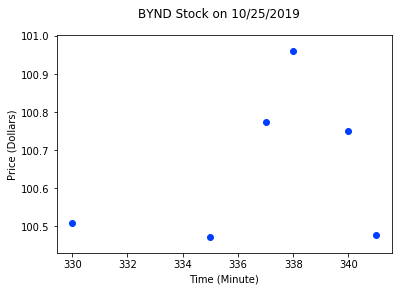

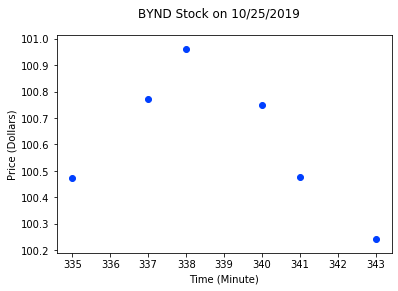

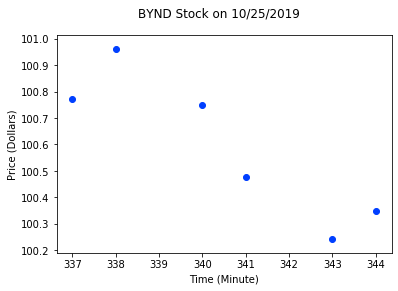

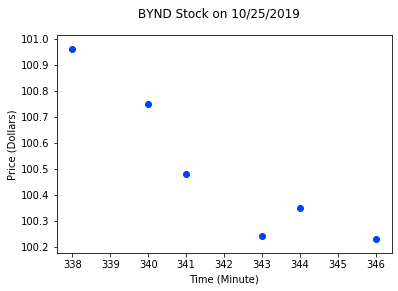

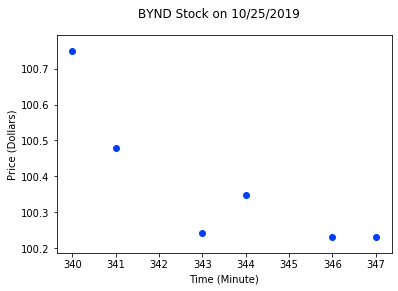

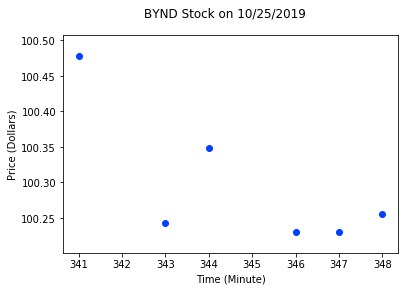

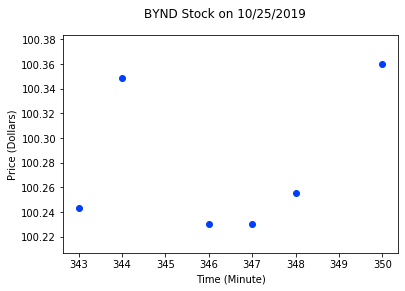

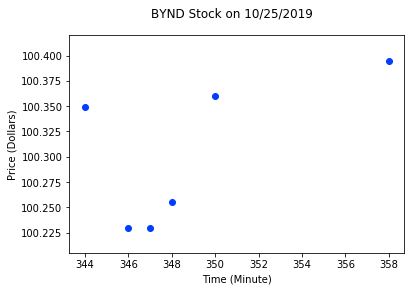

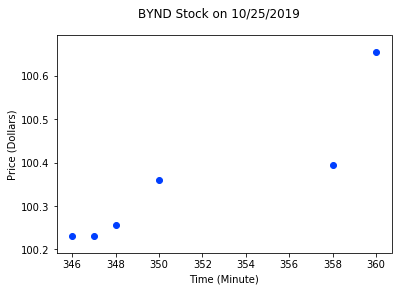

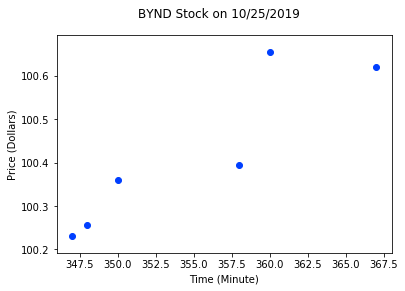

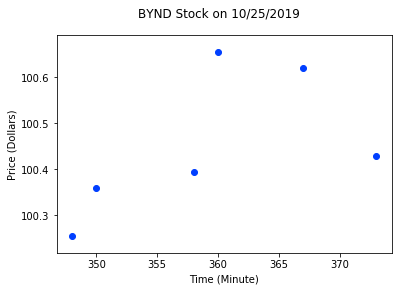

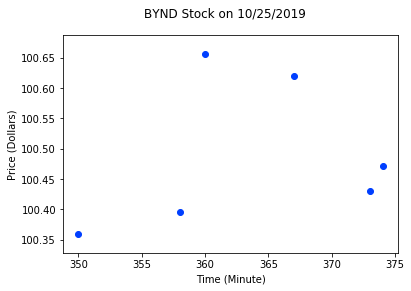

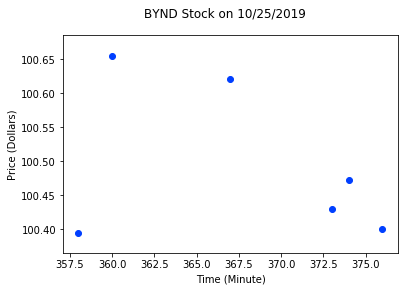

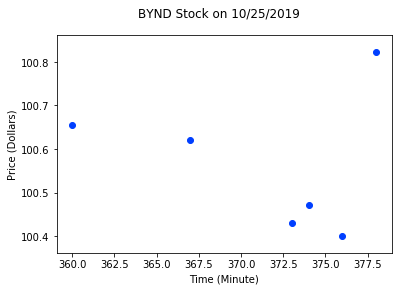

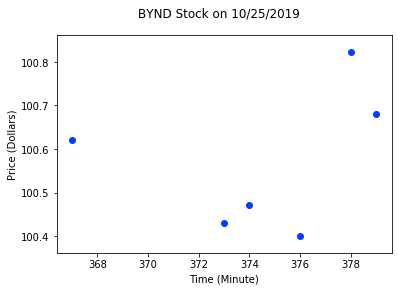

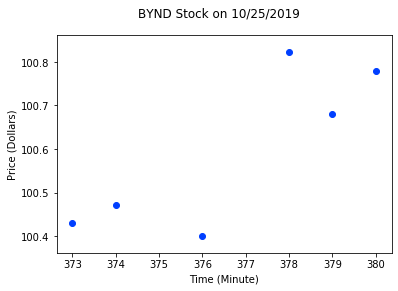

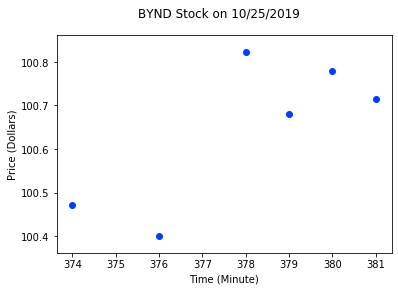

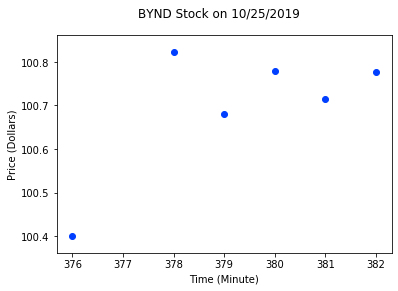

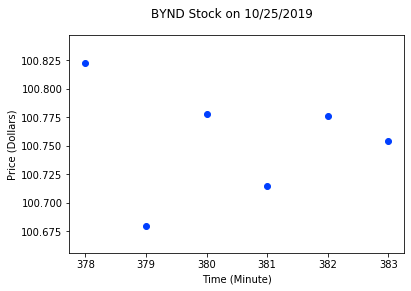

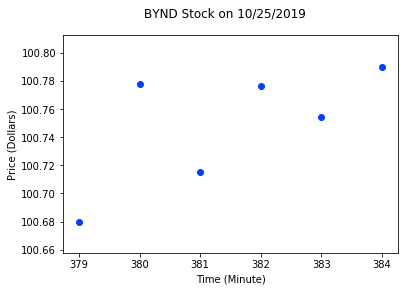

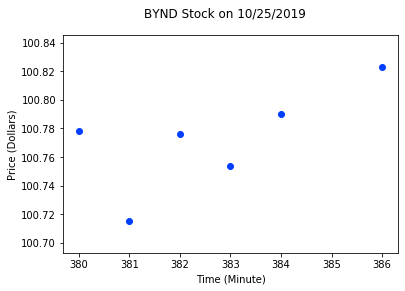

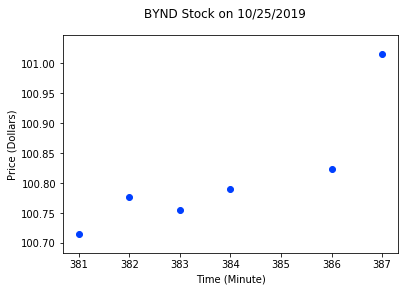

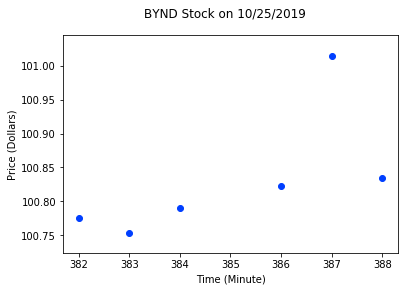

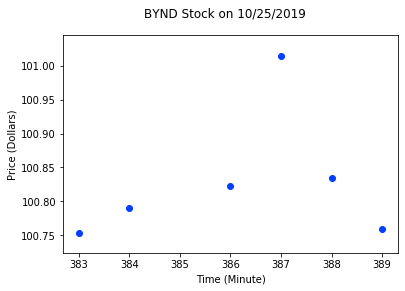

In [15]:
y = []
x = []
count = 0
index = 0

for idx, row in data.iterrows():
    if not pd.isnull(row['average']):        
        plt.suptitle('BYND Stock on 10/25/2019')
        plt.xlabel('Time (Minute)')
        plt.ylabel('Price (Dollars)')
        y.append(row['average'])
        x.append(count)
        
        x_mask = x[index - 5: index + 5]
        y_mask = y[index - 5: index + 5]
        index += 1
        
        ax = plt.gca()

        # recompute the ax.dataLim
        ax.relim()
        # update ax.viewLim using the new dataLim
        ax.autoscale_view()
        
        plt.scatter(x_mask, y_mask)
        plt.pause(0.05)

    count += 1
        
plt.show()